Neural Network(MLP) with Keras
==========================

### Importing Libraries

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

import warnings
warnings.filterwarnings('ignore')

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.4.0


### Loading the Reuters Dataset

In [8]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 10000, test_split=0.2)

In [13]:
print(len(x_train), 'training examples')
print(len(x_test), 'testing examples')

8982 training examples
2246 testing examples


In [18]:
num_class = np.max(y_train) + 1
print(num_class, 'classes')

46 classes


### Vectorizing Sequence Data and One-hot Encode Class Labels

In [19]:
tokenizer = Tokenizer(num_words=10000)

x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

In [20]:
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [21]:
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)

In [23]:
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

### Building Multilayer Perceptron Model

In [74]:
model = Sequential([
            # Hidden Layer
            Dense(50, input_shape=(10000,)),
            Activation('relu'),
            # randomly chosen 50% droputed out for regularization
            Dropout(0.5),
            # Output layer
            Dense(num_class),
            # softmax - output is with 0 to 1 , can be interpreted as probabilities 
            Activation('softmax')
        ])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                500050    
_________________________________________________________________
activation_12 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 46)                2346      
_________________________________________________________________
activation_13 (Activation)   (None, 46)                0         
Total params: 502,396
Trainable params: 502,396
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [75]:
# no need to provide pre determimed number of epochs with Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
# patience minium epochs

es = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [77]:
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    # validation split to have a validation set from training
    validation_split = 0.1,
    callbacks=[es]
)

Epoch 1/100
253/253 [==============================] - 4s 10ms/step - loss: 2.4483 - accuracy: 0.4889 - val_loss: 1.2528 - val_accuracy: 0.7264
Epoch 2/100
253/253 [==============================] - 2s 7ms/step - loss: 1.1377 - accuracy: 0.7450 - val_loss: 1.0675 - val_accuracy: 0.7608
Epoch 3/100
253/253 [==============================] - 2s 7ms/step - loss: 0.8379 - accuracy: 0.8037 - val_loss: 0.9816 - val_accuracy: 0.7831
Epoch 4/100
253/253 [==============================] - 2s 6ms/step - loss: 0.6720 - accuracy: 0.8414 - val_loss: 0.9271 - val_accuracy: 0.7998
Epoch 5/100
253/253 [==============================] - 2s 7ms/step - loss: 0.5300 - accuracy: 0.8764 - val_loss: 0.8898 - val_accuracy: 0.8109
Epoch 6/100
253/253 [==============================] - 2s 7ms/step - loss: 0.4383 - accuracy: 0.8967 - val_loss: 0.8955 - val_accuracy: 0.8165
Epoch 7/100
253/253 [==============================] - 2s 7ms/step - loss: 0.3716 - accuracy: 0.9105 - val_loss: 0.9118 - val_accuracy: 0.813

### Evaluating the Model 

In [78]:
model.evaluate(x_test, y_test, batch_size=32, verbose=1)

71/71 [==============================] - 0s 5ms/step - loss: 0.9137 - accuracy: 0.8054


[0.9137006402015686, 0.8054319024085999]

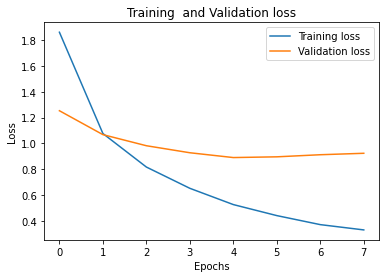

In [79]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training  and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

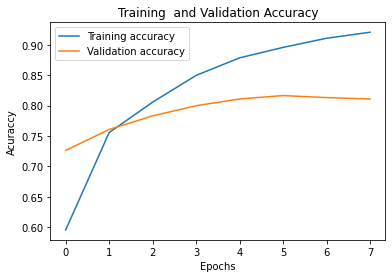

In [81]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training  and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acuraccy')
plt.legend()
plt.show()